# Q) Decision Tree 실습 ( load_breast_cancer데이터 )
sklearn의 load_breast_cancer데이터를 decisiontreeclassifier로 모델링하고 하이퍼파라미터 튜닝을 통해 깊이를 찾아보세요

- 조건 : 데이터 스플릿 8:2, random_state = 10 적용

In [1]:
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from dtreeplt import dtreeplt

In [2]:
cancerdata=datasets.load_breast_cancer()

In [5]:
# Data Split
X=cancerdata.data
y=cancerdata.target

X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=10)

In [6]:
# 객체 생성 
clf=tree.DecisionTreeClassifier()

In [7]:
# Modeling
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [8]:
# train set의 score
clf.score(X_train,y_train)

1.0

In [9]:
# Test set의 score
clf.score(X_test, y_test)

0.8947368421052632

## Visualization

In [15]:
dtree=dtreeplt(
    model=clf, 
    feature_names=cancerdata.feature_names,
    target_names=cancerdata.target_names
)

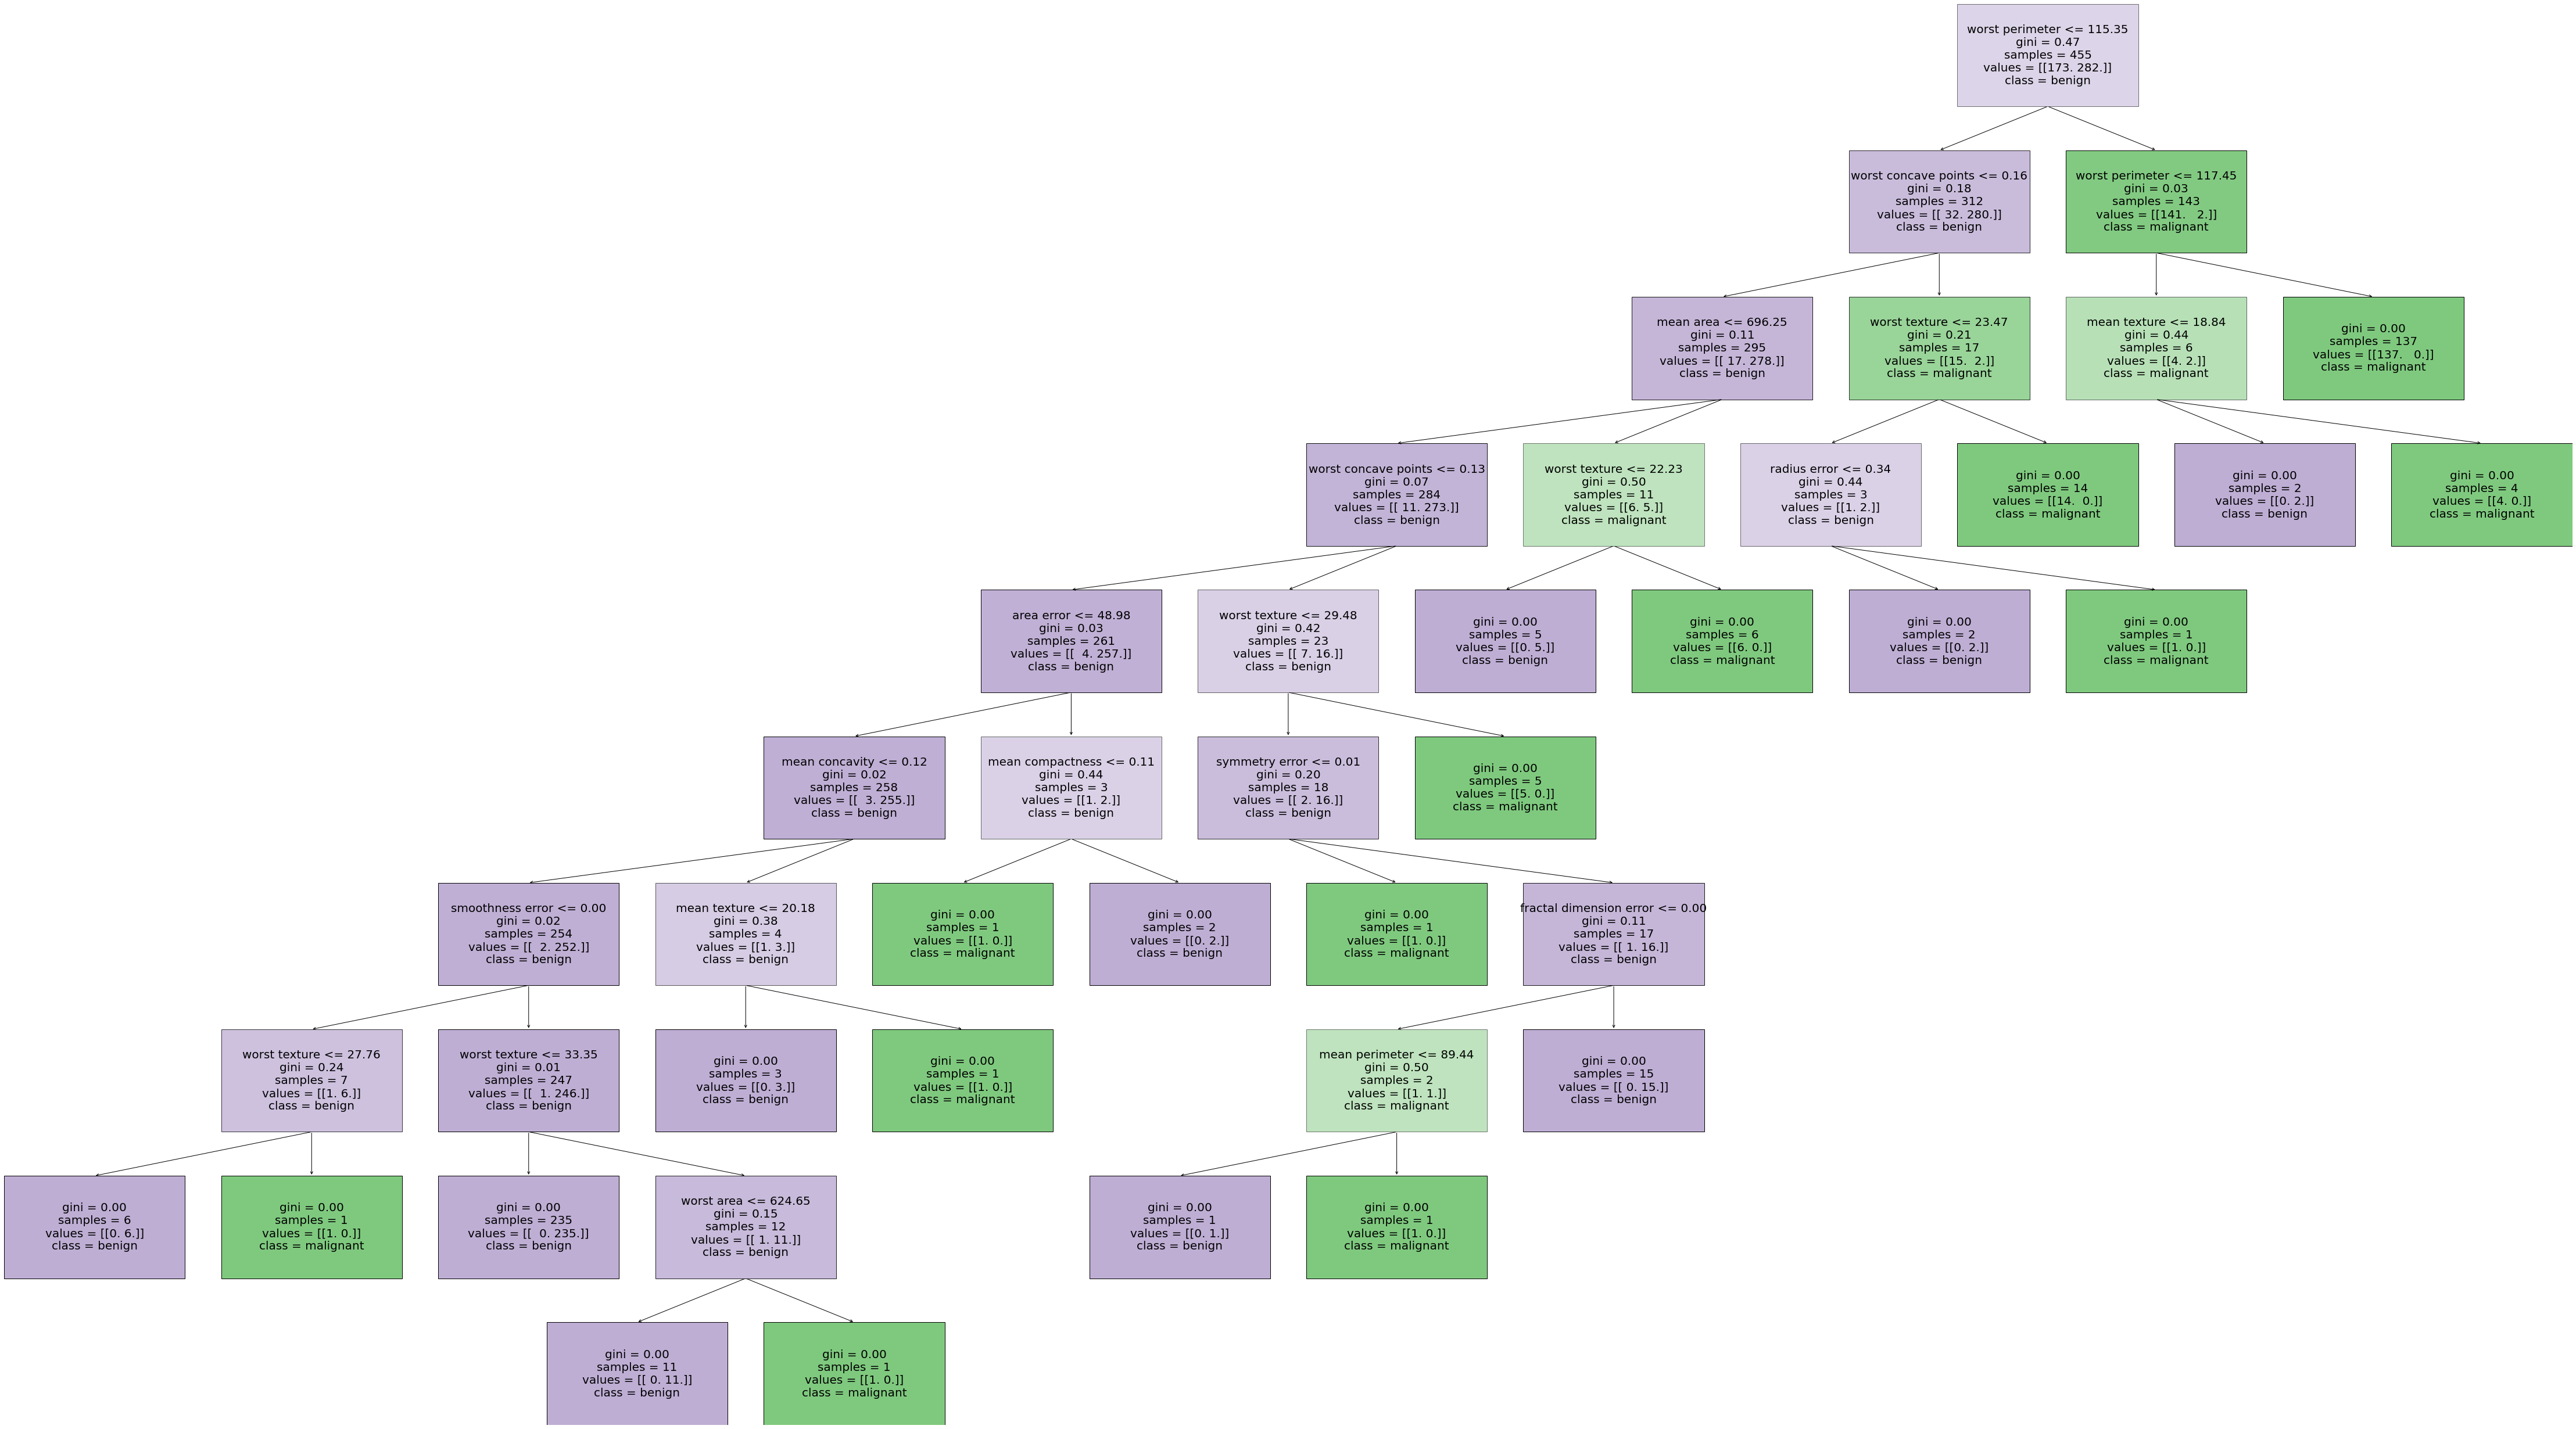

In [16]:
fig=dtree.view()

## Result
- test set의 경우 1의 정확도를 가지지만 test set에 확인해봤을 때 0.89로 정확도가 확연히 떨어짐을 볼 수 있음
- 너무 많이 분류시켰음을 볼 수 있음. 

### Solution
- prunning을 통해 Overfitting방지
- depth를 조절해줄 것!

## Prunning 을 통해 Overfitting방지하기
- 보통 max_depth=3으로 설정

In [26]:
#객체 생성(depth =3까지만 해줌)
clf1=tree.DecisionTreeClassifier(max_depth=3)

In [27]:
# Modeling
clf1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [28]:
clf1.score(X_train,y_train)

0.9626373626373627

In [29]:
clf1.score(X_test,y_test)

0.9385964912280702

In [34]:
dtree1=dtreeplt(
    model=clf1, 
    feature_names=cancerdata.feature_names,
    target_names=cancerdata.target_names
)

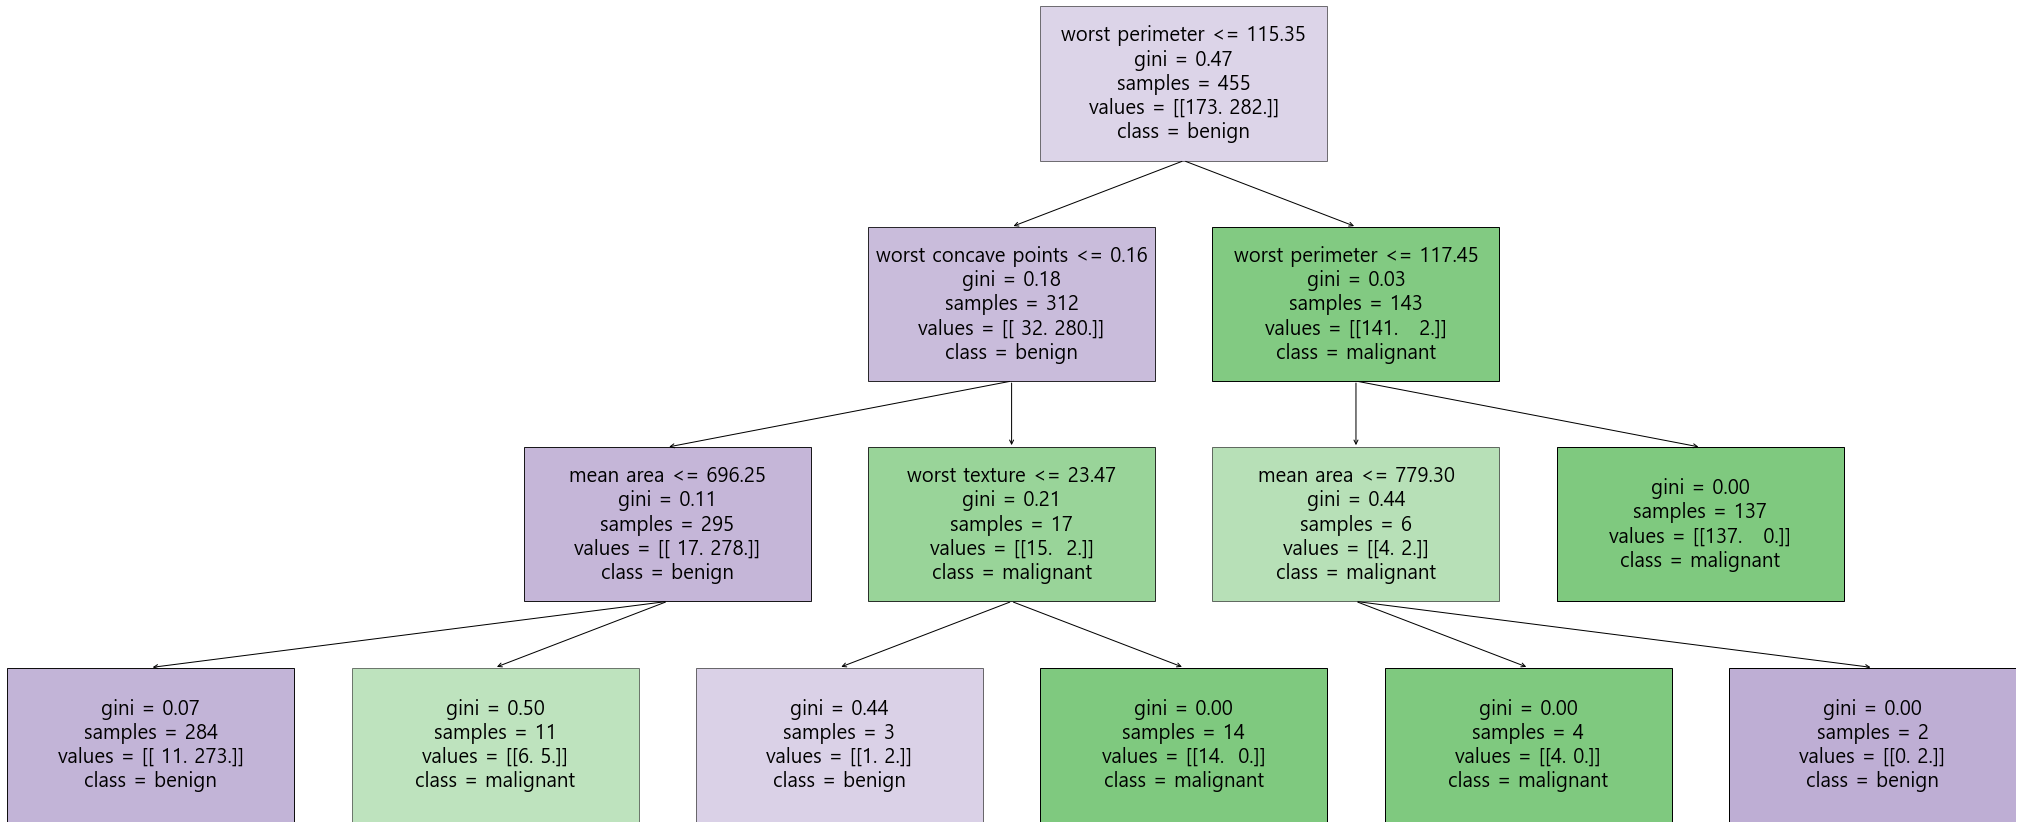

In [35]:
fig=dtree1.view()

## Result
- train dataset에 대한 정확도가 전에 비해 떨어졌음
- 그러나 test dataset에 대한 정확도가 이전에 비해 상승

## Feature Importance


In [30]:
## 한글 폰트 설정
import matplotlib
import matplotlib.font_manager as fm
from matplotlib import rc

In [31]:
font_name=fm.FontProperties(fname='C:\\WINDOWS\\Fonts\\malgun.TTF')
font_name.get_name()
rc('font',family=font_name.get_name())

In [32]:
clf1.feature_importances_

array([0.        , 0.        , 0.        , 0.04345606, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0117747 , 0.82753145, 0.        , 0.        ,
       0.        , 0.        , 0.11723779, 0.        , 0.        ])

(-1.0, 30.0)

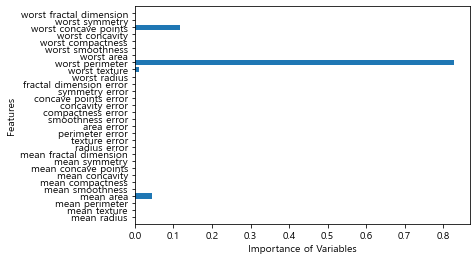

In [33]:
# 그래프로 확인
n_features=cancerdata.data.shape[1]
plt.barh(range(n_features), clf1.feature_importances_,align='center')
plt.yticks(np.arange(n_features),cancerdata.feature_names)
plt.xlabel('Importance of Variables',)
plt.ylabel('Features')
plt.ylim(-1,n_features)


## Result
- worst perimeter변수가 data를 분류하는 데 큰 역할을 하고 있음을 볼 수 있다.